## Titanic: 泰坦尼克号数据分析

1. 加载数据和模块 
2. 初步勘探 
3. 特征之间的关系 
4. 填充缺失值
5. 特征工程
6. 为建模做准备 
7. 模型化 
8. 准备提交的预测 

#### 加载模块

In [6]:
# pandas 包
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn 包
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [7]:
# get titanic & test csv files as a DataFrame
titanic_df = pd.read_csv("/data/jupyter/root/pydata-book/datasets/titanic/train.csv")
test_df    = pd.read_csv("/data/jupyter/root/pydata-book/datasets/titanic/test.csv")

# preview the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# 查看训练数据和测试数据信息
print('********************* train set ************************')
titanic_df.info()
print('********************* train set ************************')
test_df.info()

********************* train set ************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
********************* train set ************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non

* PassengerId => 乘客ID
* Survived => 是否存活,存活[1],死亡[0]（测试数据里面需要我们预测的）
* Pclass => 乘客等级(1/2/3等舱位)
* Name => 乘客姓名
* Sex => 性别
* Age => 年龄
* SibSp => 堂兄弟/妹个数
* Parch => 父母与小孩个数
* Ticket => 船票信息
* Fare => 票价
* Cabin => 客舱
* Embarked => 登船港口

以上, 我们有1个浮点类型特征 (Fare), 1个 整数变量 (Age), 3 个序号整数特征 (Plcass, SibSp, Parch), 2 个分类文本功能 (Sex, Embarked), 和3个文本字符串功能 (Ticket, Cabin, Name)


#### 查看缺失值

In [4]:
print('********************* train set ************************')
print(titanic_df.isnull().sum())
print('********************* test set ************************')
print(test_df.isnull().sum())

********************* train set ************************
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
********************* test set ************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


训练&测试数据集都有缺失，在乘客年龄和客舱确实比较多，
测试数据共有891条, 试数据共有418条。

个人猜测：
查看将训练&测试数据，Age缺失数据和Cabin缺失数据比例，对比比较可知：
比例非常接近，所以测试数据应该是从所有数据（1309条）中随机抽取出来的，所以啊！我觉得 现实工作中的模型 做测试也是一样的！ 

In [5]:
# 测试数据/测试数据集
print(891/418)
# Age：
print(177/86)
# Cabin：
print(687/327)

2.1315789473684212
2.058139534883721
2.1009174311926606


### 除去不必要的列,
这些列在分析和预测中不会有用,分别由乘客id,姓名，和船票信息

In [6]:
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

### 特征工程
特征之间的关系
填充缺失值

#### Embarked

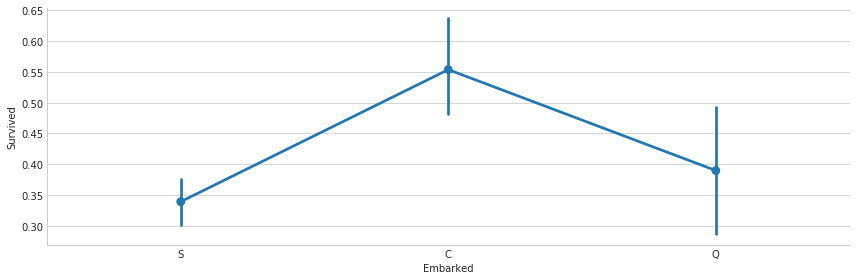

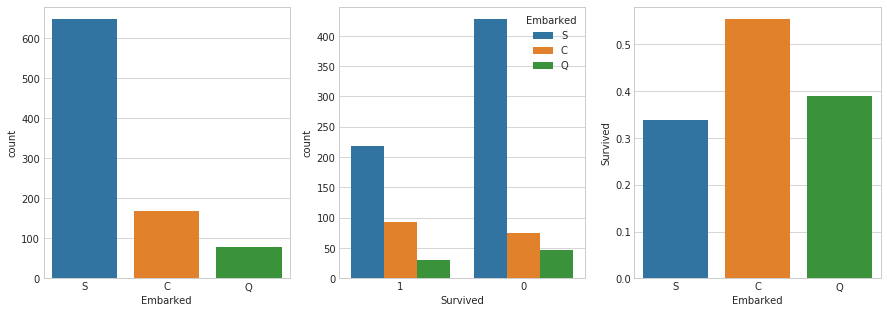

In [4]:
#  将Embarked的缺失值填充为"S"
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

# 画图
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked',data=titanic_df,kind='count',order=['S','C','Q'],ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_df, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_df, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
# 对训练数据以'Embarked‘分组，为获取幸存旅客的平均值
embark_perc = titanic_df[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)


# get_dummies进行one-hot编码  “哑变量矩阵" 例如：C Q S  -> 0 0 1表示该乘客登船港口在"S"
embark_dummies_titanic  = pd.get_dummies(titanic_df['Embarked'])
embark_dummies_titanic.drop(['S'], axis=1, inplace=True)

embark_dummies_test  = pd.get_dummies(test_df['Embarked'])
embark_dummies_test.drop(['S'], axis=1, inplace=True)

titanic_df = titanic_df.join(embark_dummies_titanic)
test_df    = test_df.join(embark_dummies_test)

titanic_df.drop(['Embarked'], axis=1,inplace=True)
test_df.drop(['Embarked'], axis=1,inplace=True)

将 Embarked 作为预测变量，删除"S" 哑变量，留下"C" & "Q"，他们似乎有一个好的生存率
因为从逻辑上来说, "Embarked"在预测上似乎并不有用
在图上克制"S"生存表现不好，乘客最多，死亡人数高很多



#### Fare

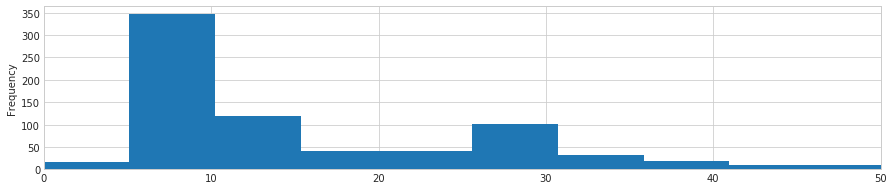

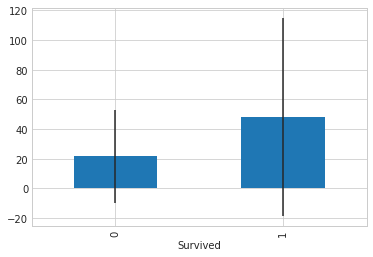

In [8]:
# Fare


# 中位数填充测试数据中缺失的Fare
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)


# 浮点型转换为整形
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

# 将Fare 分成生存和死亡乘客数据
fare_not_survived = titanic_df["Fare"][titanic_df["Survived"] == 0]
fare_survived     = titanic_df["Fare"][titanic_df["Survived"] == 1]

# 计算均值和标准差的生存/死亡的乘客的票价
avgerage_fare = DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare      = DataFrame([fare_not_survived.std(), fare_survived.std()])

# plot
titanic_df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avgerage_fare.index.names = std_fare.index.names = ["Survived"]
avgerage_fare.plot(yerr=std_fare,kind='bar',legend=False)

可以得知，票价在20以下的人数较多，也就是说，最多的少于10的票价，切票价贵的存活的机会大些。

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


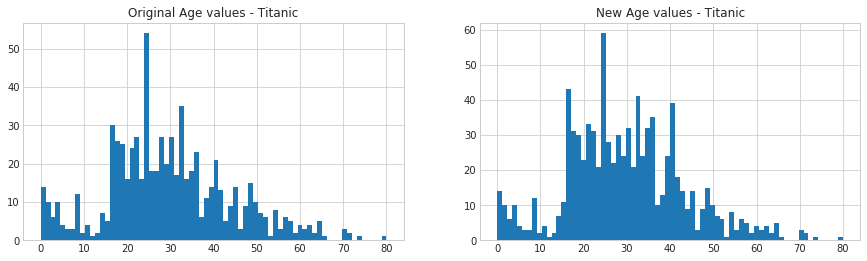

In [9]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')


# titanic_df 中计算均值，标准差和空值的数量 
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# test_df 中计算均值，标准差和空值的数量
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# 生成随机数 (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# 绘制原始年龄值
# N 删除所有 null 值, 然后转换为 int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# 使用生成的随机值填充 "年龄" 列中的 NaN 值
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# float 转换为 int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# 绘制新的年龄值
titanic_df['Age'].hist(bins=70, ax=axis2)
# test_df['Age'].hist(bins=70, ax=axis4)

使用Age数据均值加减标准差中的随机数填充缺失的Age特征数据，新的Age特征与原数分布一致

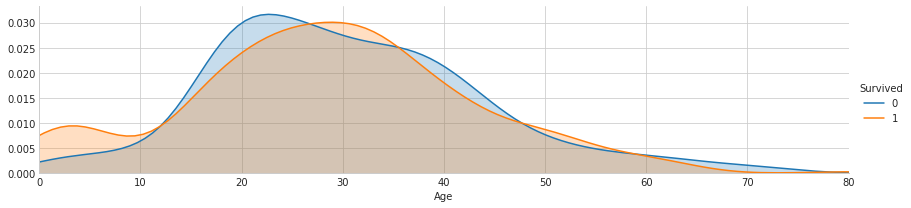

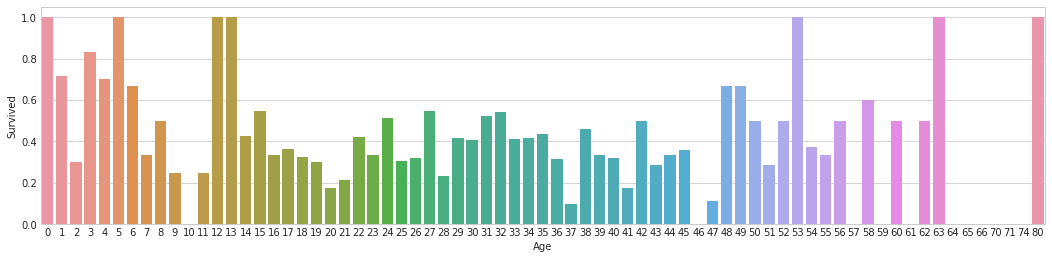

In [10]:
# .... 继续绘制 "绘图年龄" 

# 不同年龄存活/死亡不同特征值时的分布密度 
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
# xlim()：设置x轴刻度的取值范围
facet.set(xlim=(0, titanic_df['Age'].max()))
# 绘制图例
facet.add_legend()

# 平均生还乘客年龄
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = titanic_df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

10岁以下的小孩存活机会大，年轻人死了很多；每个年龄存活比例，两边高中间低，说明先救老人和小孩

In [11]:
# Cabin
# 它有很多 NaN 值, 因此不会对预测产生显著影响。
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


[Text(0,0,'With Family'), Text(0,0,'Alone')]

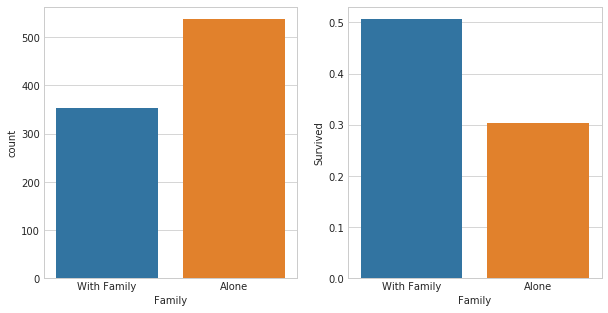

In [12]:
# Family

# 我们用一列数据代替Parch & SibSp , 如果乘客有任何家庭成员在船上,

# 意味着，有家庭成员是否会增加生存的机会
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)

# plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_df, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
# 生存的那有/没有任何家庭成员生存的平均值
family_perc = titanic_df[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

大多数是一个人在船上，有家庭成员的存活机会更大

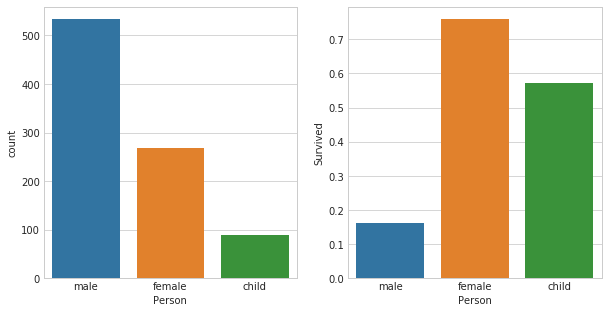

In [13]:
# Sex

# 正如我们所看到的, 在船上的孩子 (年龄 16) 似乎有很高的生存机会.
# 所以, 我们可以将乘客归类为男性、女性和儿童
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex 
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# 删除Sex, 因为我们创建Person列
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)

# 创建 Person列 哑变量 ，删除Male存活的人，因为生存率最低

person_dummies_titanic  = pd.get_dummies(titanic_df['Person'])
person_dummies_titanic.columns = ['Child','Female','Male']
person_dummies_titanic.drop(['Male'], axis=1, inplace=True)

person_dummies_test  = pd.get_dummies(test_df['Person'])
person_dummies_test.columns = ['Child','Female','Male']
person_dummies_test.drop(['Male'], axis=1, inplace=True)

titanic_df = titanic_df.join(person_dummies_titanic)
test_df    = test_df.join(person_dummies_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_df,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_df, ax=axis1)

# 每个人的平均生存(male, female, or child)
person_perc = titanic_df[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

titanic_df.drop(['Person'],axis=1,inplace=True)
test_df.drop(['Person'],axis=1,inplace=True)

成年男性数量最多，小孩数量最少， 成年男性死亡的最多

In [11]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Child,Female
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,male,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,female,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,female,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,male,0,0


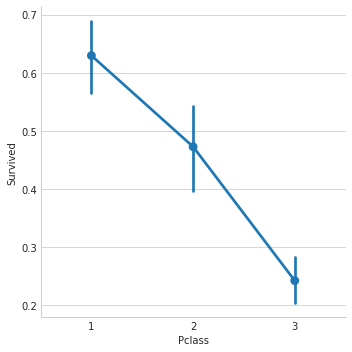

In [14]:
# Pclass

# sns.factorplot('Pclass',data=titanic_df,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_df,size=5)

# 创建 Pclass列 哑变量, & 删除存活率最低的三等舱乘客
pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_test  = pd.get_dummies(test_df['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_test.drop(['Class_3'], axis=1, inplace=True)

titanic_df.drop(['Pclass'],axis=1,inplace=True)
test_df.drop(['Pclass'],axis=1,inplace=True)

titanic_df = titanic_df.join(pclass_dummies_titanic)
test_df    = test_df.join(pclass_dummies_test)

三等舱的乘客存活的数量最少

In [15]:
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [16]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
logreg.score(X_train, Y_train)

0.80808080808080807

In [17]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
svc.score(X_train, Y_train)

0.86980920314253651

In [18]:
# Random Forests
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)

0.9640852974186308

In [19]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn.score(X_train, Y_train)

0.8204264870931538

In [20]:
# Gaussian Naive Bayes

gaussian = GaussianNB()

gaussian.fit(X_train, Y_train)

Y_pred = gaussian.predict(X_test)

gaussian.score(X_train, Y_train)

0.7620650953984287

In [21]:
# 利用逻辑回归法获取各特征的相关系数
coeff_df = DataFrame(titanic_df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

coeff_df

,Features,Coefficient Estimate
0,Age,-0.026619
1,Fare,0.000796
2,C,0.606724
3,Q,0.317816
4,Family,-0.227914
5,Child,1.755041
6,Female,2.786632
7,Class_1,2.058563
8,Class_2,1.156422


### 保存结果

In [22]:
# submission = pd.DataFrame({
#         "PassengerId": test_df["PassengerId"],
#         "Survived": Y_pred
#     })
# submission.to_csv('titanic.csv', index=False)